In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os
import seaborn as sns


In [38]:
train_df = pd.read_csv('train/train.csv', sep=',')

train_df['PID'] = train_df['Path'].str.extract(r'pid(\d+)')
train_df['Study'] = train_df['Path'].str.extract(r'study(\d+)')
train_df['View'] = train_df['Path'].str.extract(r'view(\d+)')
train_df = train_df.drop(columns=['Unnamed: 0', 'Path'])
#df = df.set_index('PID')

#abbreviate
train_df = train_df.rename(columns={'Enlarged Cardiomediastinum': 'Enlarg. Cardiomed.'})

#reoder
train_df = train_df[['PID', 'Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding', 'Enlarg. Cardiomed.', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']]

subset = ['01310', '01319', '01327', '01335', '01339', '01343', '01351', '01376', '01384', '01388', '01392', '01449', '01457', '01465', '01473', '01481', '01498']
subset_df = train_df[train_df['PID'].isin(subset)]

#df.head()
subset_df.head()


,PID,Study,View,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarg. Cardiomed.,Cardiomegaly,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
8403,01343,3,1,Male,51,Frontal,PA,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,-1.0,NaN
8404,01343,3,2,Male,51,Lateral,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,-1.0,NaN
8405,01343,1,1,Male,48,Frontal,AP,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,0.0,-1.0,1.0,NaN,NaN,NaN
8406,01343,2,1,Male,48,Frontal,AP,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,0.0,-1.0,1.0,NaN,NaN,NaN
27029,01376,1,1,Female,27,Frontal,PA,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN


Train


<Figure size 3000x600 with 0 Axes>

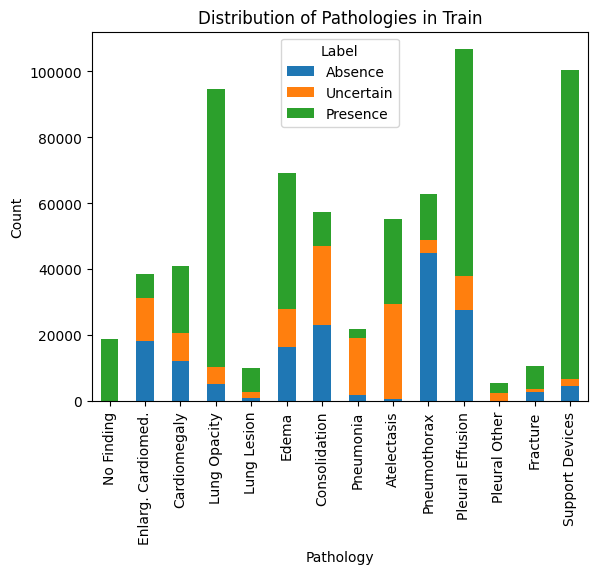

Subset


<Figure size 3000x600 with 0 Axes>

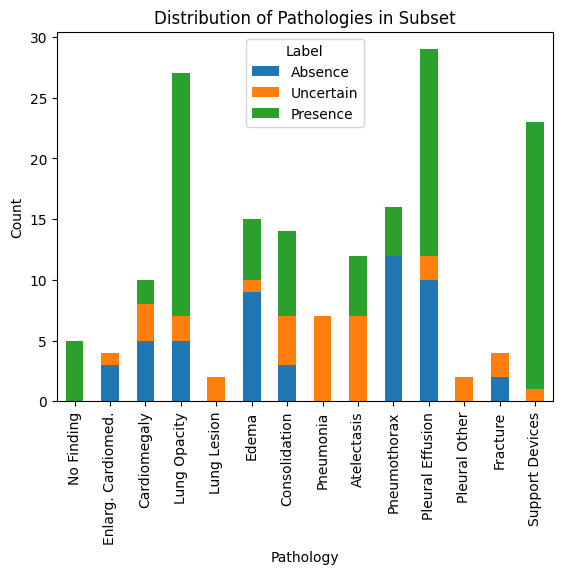

In [39]:

def pathology_dist(df, title):
    relevant_cols = df.drop(columns=['PID', 'Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])
    # Count num of +1, -1, and 0 for each
    counts = relevant_cols.apply(lambda x: x.value_counts())

    plt.figure(figsize=(30, 6))
    ax = counts.T.plot(kind='bar', stacked=True)
    plt.title('Distribution of Pathologies in ' + title)
    plt.xlabel('Pathology')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = {
        '1.0': 'Presence',
        '-1.0': 'Absence',
        '0.0': 'Uncertain',
    }
    labels = [new_labels[label] for label in labels]
    plt.legend(handles, labels, title='Label')

    plt.show()

print("Train")
pathology_dist(train_df, 'Train')
print("Subset")
pathology_dist(subset_df, 'Subset')

# Our susbset is a fairly good representation of the distribution
# of pathologies in the training data

Train


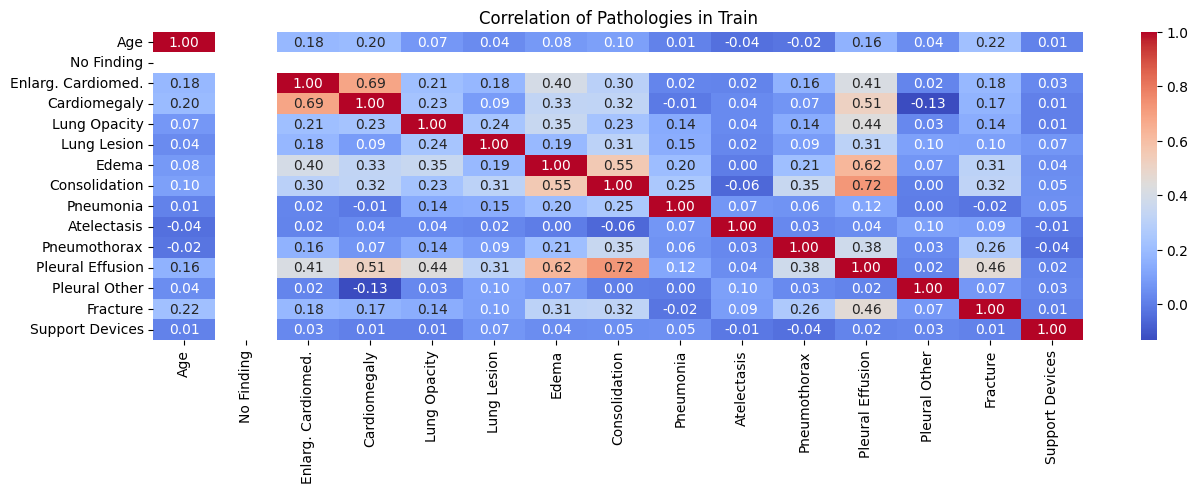

Subset


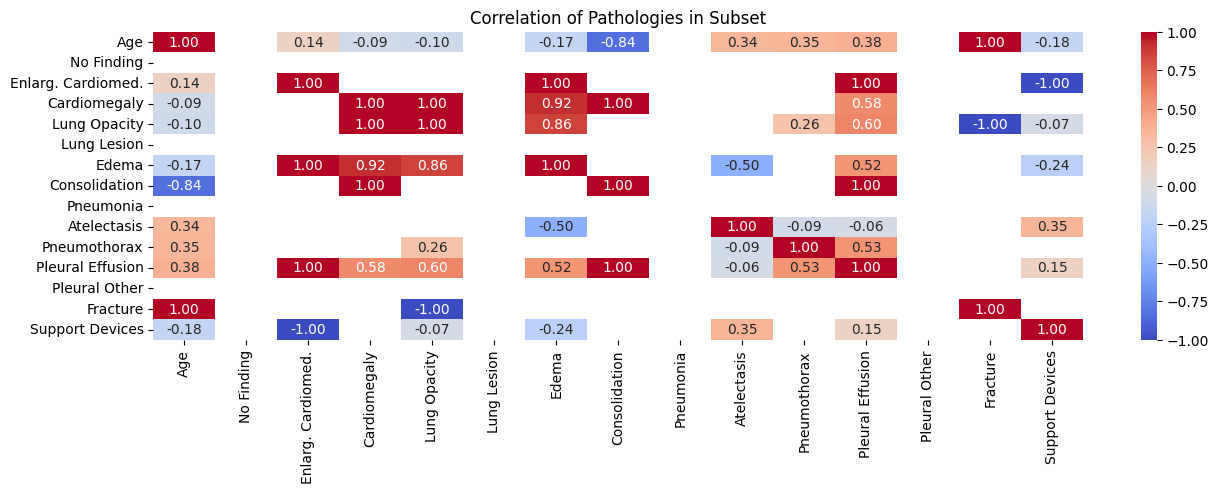

In [40]:
def correlation_heatmap(df, title):
    numeric_cols = df.select_dtypes(include=np.number).columns
    corr_df = df[numeric_cols].corr()

    plt.figure(figsize=(15, 4))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation of Pathologies in ' + title)

    plt.show()

print('Train')
correlation_heatmap(train_df, 'Train')
print('Subset')
correlation_heatmap(subset_df, 'Subset')


# There are only a couple strong correlations between pathologies
# However, when looking at a subset of the data, the correlations
# are much stronger, as you might expect due to the small sample size


Train


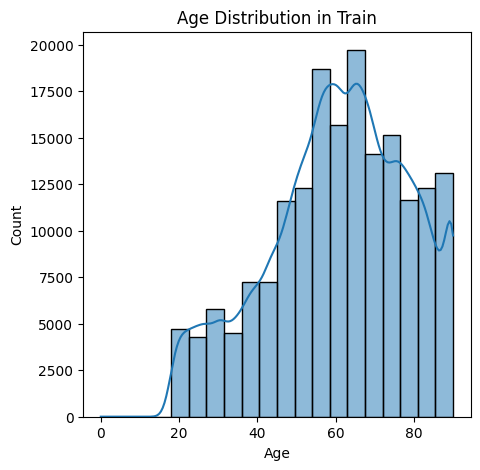

Subset


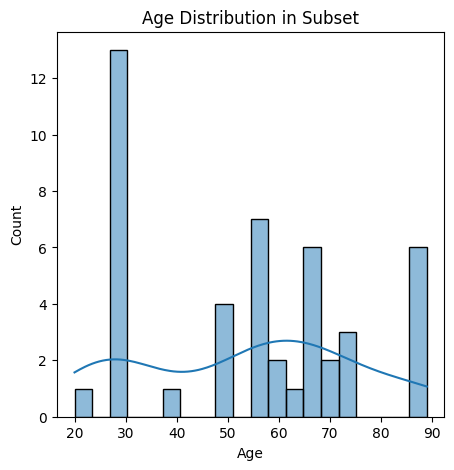

Train


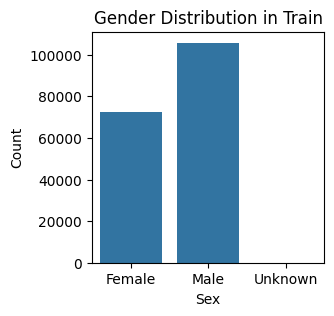

Subset


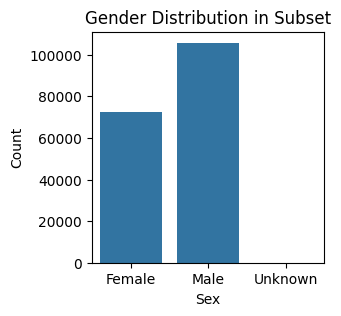

In [41]:
def age_dist(df, title):
    plt.figure(figsize=(5, 5))
    sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution in ' + title)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

def sex_dist(df, title):
    plt.figure(figsize=(3, 3))
    sns.countplot(data=train_df, x='Sex')
    plt.title('Gender Distribution in ' + title)
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

print("Train")
age_dist(train_df, 'Train')
print("Subset")
age_dist(subset_df, 'Subset')

print("Train")
sex_dist(train_df, 'Train')
print("Subset")
sex_dist(subset_df, 'Subset')

# The age of patients in the subset is not representative of the
# age of patients in the training data
# The sex of patients in the subset is fine though

Train


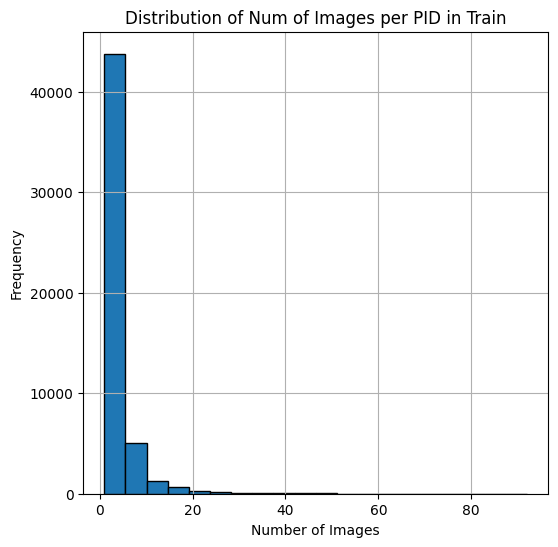

Subset


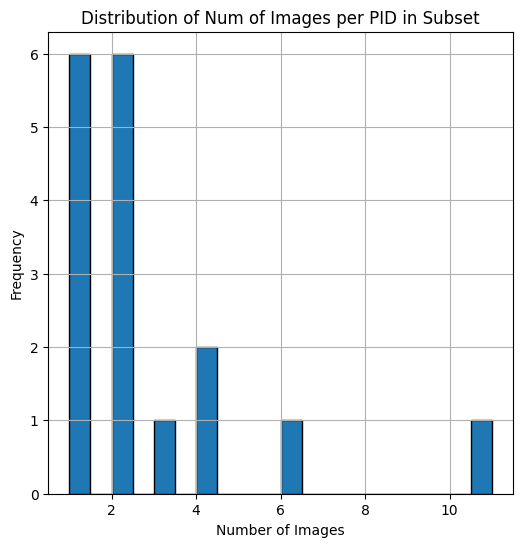

In [42]:
def images_per_pid_histogram(df, title):
    pid_counts = df.groupby('PID').size()

    plt.figure(figsize=(6, 6))
    plt.hist(pid_counts, bins=20, edgecolor='black')
    plt.title('Distribution of Num of Images per PID in ' + title)
    plt.xlabel('Number of Images')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.show()

print("Train")
images_per_pid_histogram(train_df, 'Train')
print("Subset")
images_per_pid_histogram(subset_df, 'Subset')

# The distribution of the number of images per PID in the training
# data is shockingly skewed. Most PIDs have only 1 image but 
# suprisingly there are some PIDs with nearly a 100 images
# This is definitely something to keep in mind when training models
# on this data
# The distribution of the number of images per PID in the subset
# is still skewed but not as much and the range is cut off at ~ten images

Train


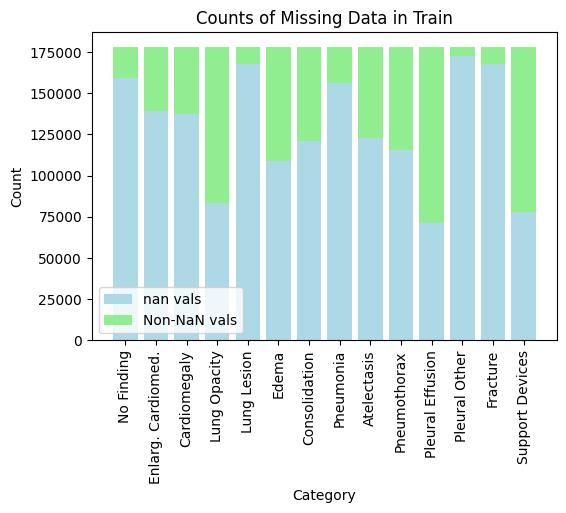

Subset


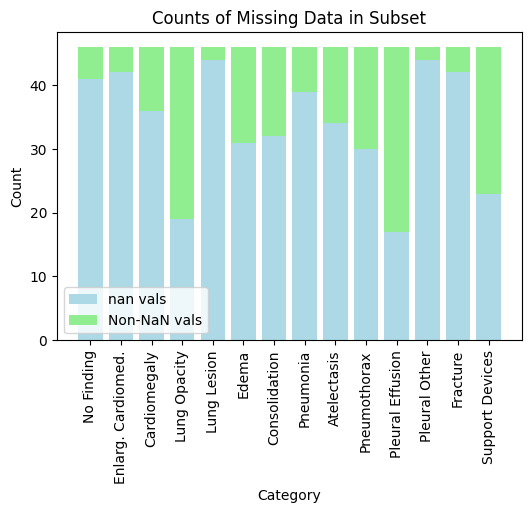

In [43]:
def missing_data(df, title):
    relevant_cols = df.drop(columns=['PID', 'Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])

    nan_counts = relevant_cols.isnull().sum()
    not_nan_counts = relevant_cols.notnull().sum()

    plt.figure(figsize=(6, 4))
    plt.bar(nan_counts.index, nan_counts, label='nan vals', color='lightblue')
    plt.bar(not_nan_counts.index, not_nan_counts, bottom=nan_counts, label='Non-NaN vals', color='lightgreen')
    plt.title('Counts of Missing Data in ' + title)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

print("Train")
missing_data(train_df, 'Train')
print("Subset")
missing_data(subset_df, 'Subset')

# There is a lot of missing data in the training data
# The categories with the most missing data are 'Pleural Other'
# and 'Fracture' but all columns are missing a significant amount
# of data
# The porportion of missing data in each category in the subset
# is much very similar to in the training data

Train


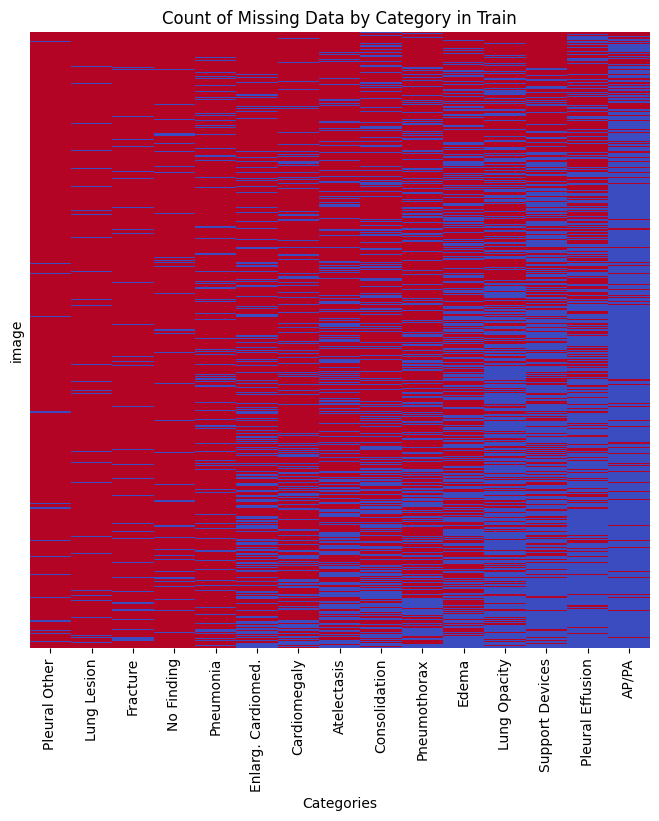

Subset


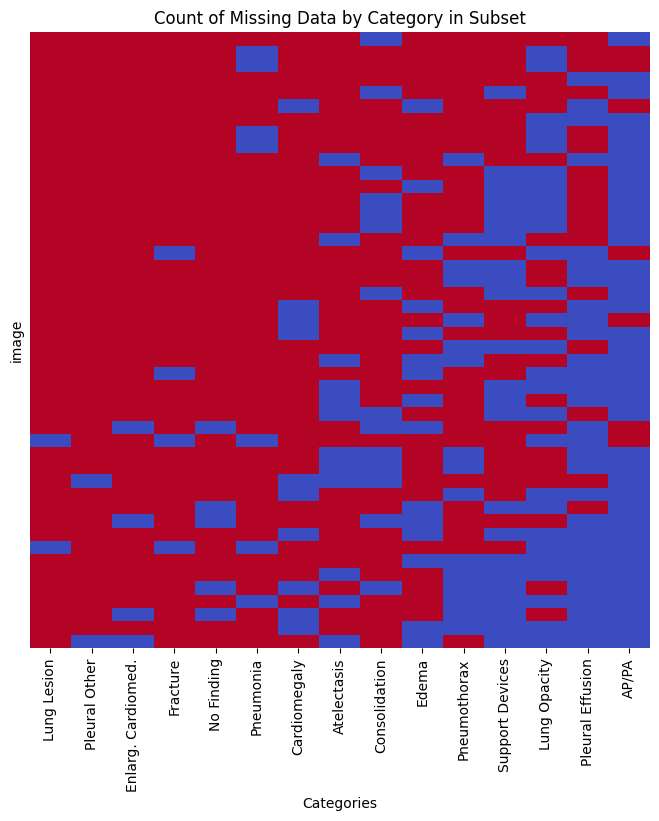

In [44]:
def missing_per_image(df, title):
    relevant_cols = df.drop(columns=['PID', 'Study', 'View', 'Sex', 'Age', 'Frontal/Lateral'])

    nan_vals_by_col = relevant_cols.isnull().sum()
    sorted_cols = nan_vals_by_col.sort_values(ascending=False).index
    relevant_cols = df[sorted_cols]

    nan_vals_by_row = relevant_cols.isnull().sum(axis=1)
    sorted_rows = nan_vals_by_row.sort_values(ascending=False).index

    plt.figure(figsize=(8, 8))
    sns.heatmap(relevant_cols.loc[sorted_rows].isnull(), cmap='coolwarm', cbar=False)
    plt.title('Count of Missing Data by Category in ' + title)
    plt.xlabel('Categories')
    plt.ylabel('image')
    plt.yticks([])
    plt.show()

print("Train")
missing_per_image(train_df, 'Train')
print("Subset")
missing_per_image(subset_df, 'Subset')

# All images  in the training data seem to have some NaN values
# There is not really a meaningful pattern to the missing data in the training data
# nor a subset of the data that has less missing data across the board

Train


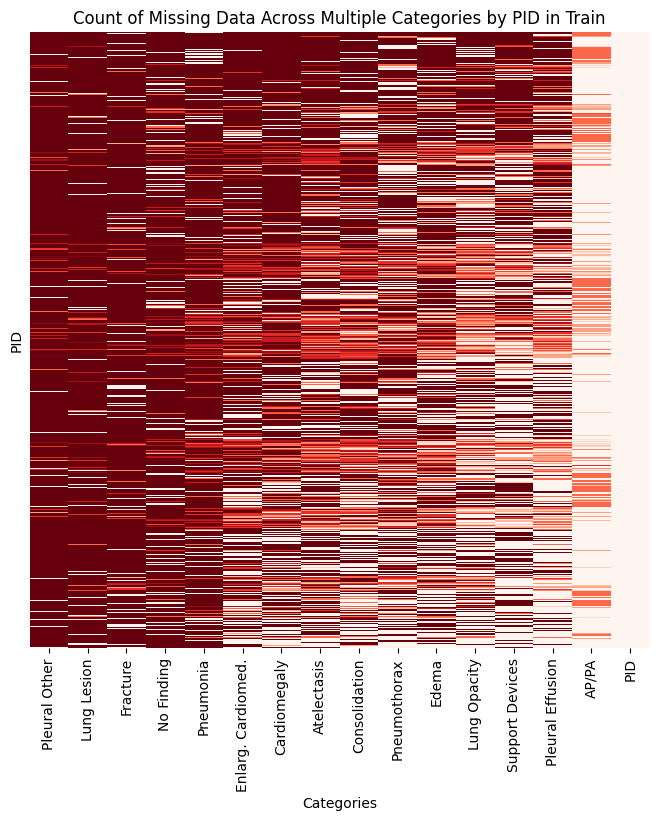

30 PIDs with least missing data


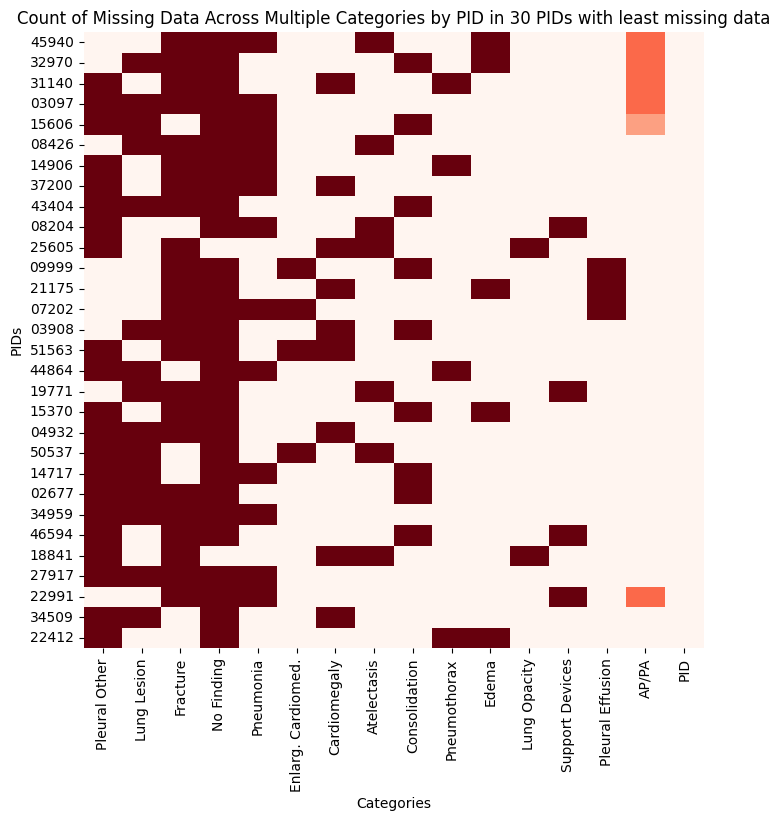

Subset


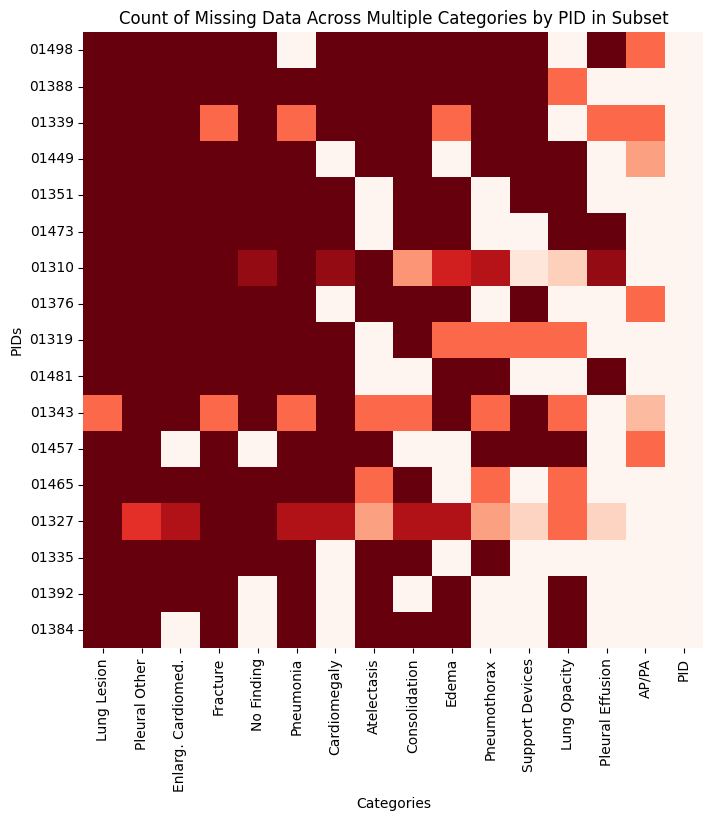

In [45]:
def missing_per_pid(df, title, crop = False):
    relevant_cols = df.drop(columns=['Study', 'View', 'Sex', 'Age', 'Frontal/Lateral'])

    nan_vals_by_column = relevant_cols.isnull().sum()
    sorted_cols = nan_vals_by_column.sort_values(ascending=False).index
    relevant_cols = df[sorted_cols]


    num_images_per_pid = df.groupby('PID').size()
    nan_vals_by_pid = relevant_cols.isnull().groupby(df['PID']).sum()
    nan_vals_normalized = nan_vals_by_pid.div(num_images_per_pid, axis=0)
    sorted_pids = nan_vals_normalized.sum(axis=1).sort_values(ascending=False).index

    plt.figure(figsize=(8, 8))
    if crop:
        sns.heatmap(nan_vals_normalized.loc[sorted_pids].tail(30), cmap='Reds', cbar=False)
    else:
        sns.heatmap(nan_vals_normalized.loc[sorted_pids], cmap='Reds', cbar=False)
    plt.title('Count of Missing Data Across Multiple Categories by PID in ' + title)
    plt.xlabel('Categories')

    if len(sorted_pids) < 50 or crop:
        plt.ylabel('PIDs')
    else:
        plt.yticks([])
    plt.show()

print("Train")
missing_per_pid(train_df, 'Train')
print("30 PIDs with least missing data")
missing_per_pid(train_df, '30 PIDs with least missing data', crop=True)
print("Subset")
missing_per_pid(subset_df, 'Subset')

# Since people have different numbers of images, it is more informative
# to look at the proportion of missing data per PID
# The takeaways for the missing data per PID is similar to the
# distribution of missing data per image
# Although it is easier to find a subset of PIDs with less missing data


Train


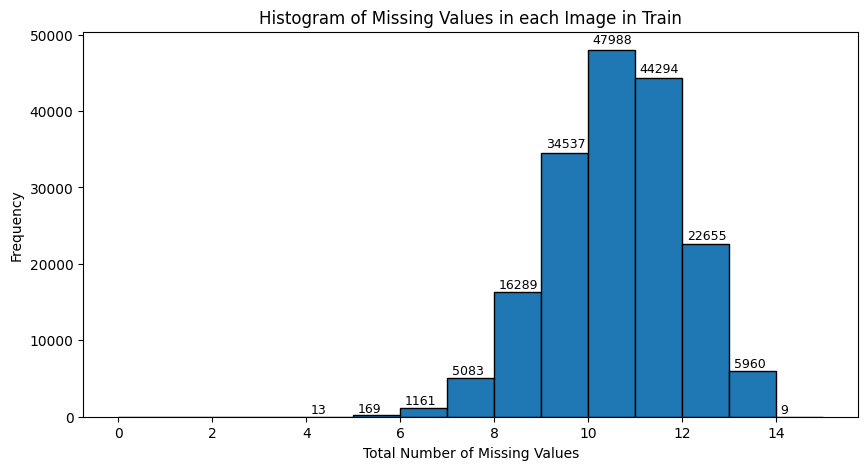

Subset


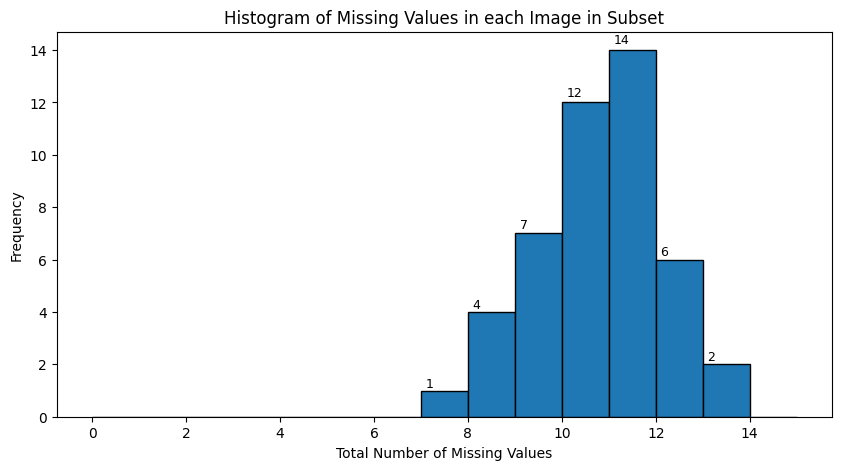

In [46]:
def missing_dist(df, title):
    relevant_cols = df.drop(columns=['PID', 'Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])
    nan_vals = relevant_cols.isnull().sum(axis=1)

    custom_bins = [i for i in range(0, 16)]
    plt.figure(figsize=(10, 5))
    plt.hist(nan_vals, bins=custom_bins, edgecolor='black')
    plt.title('Histogram of Missing Values in each Image in ' + title)
    plt.xlabel('Total Number of Missing Values')
    plt.ylabel('Frequency')

    for i in range(20):
        count = (nan_vals == i).sum()
        if count > 0:
            plt.text(i + 0.1, count*1.01, str(count), ha='left', va='bottom', fontsize=9)

    plt.show()

print("Train")
missing_dist(train_df, 'Train')
print("Subset")
missing_dist(subset_df, 'Subset')

# The distribution of missing data in the training data is
# fairly uniform, with most images having 9-12 missing values
# and none having 4 or less missing values
# Nonetheless, there are over 1000 images with less than
# 7 missing values, but as we will see these images are not
# evenly distributed across PIDs nor representative of the
# dataset in other ways

In [47]:
relevant_cols = train_df.drop(columns=['Study', 'View', 'Sex', 'Age', 'Frontal/Lateral'])

nan_vals_by_column = relevant_cols.isnull().sum()
sorted_cols = nan_vals_by_column.sort_values(ascending=False).index
relevant_cols = train_df[sorted_cols]


num_images_per_pid = train_df.groupby('PID').size()
nan_vals_by_pid = relevant_cols.isnull().groupby(train_df['PID']).sum()
nan_vals_normalized = nan_vals_by_pid.div(num_images_per_pid, axis=0)
sorted_pids = nan_vals_normalized.sum(axis=1).sort_values(ascending=False).index

least_nan_pids = sorted_pids[-30:]

least_nan_pids_df = train_df[train_df['PID'].isin(least_nan_pids)]
least_nan_pids_df.head()


,PID,Study,View,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarg. Cardiomed.,Cardiomegaly,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
1418,15606,1,1,Female,60,Frontal,PA,NaN,-1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,-1.0,1.0,NaN,1.0,1.0
1419,15606,1,2,Female,60,Frontal,PA,NaN,-1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,-1.0,1.0,NaN,1.0,1.0
1420,15606,1,3,Female,60,Lateral,NaN,NaN,-1.0,1.0,...,NaN,1.0,NaN,NaN,1.0,-1.0,1.0,NaN,1.0,1.0
2162,50537,1,1,Female,90,Frontal,AP,NaN,NaN,1.0,...,NaN,1.0,1.0,0.0,NaN,-1.0,1.0,NaN,1.0,1.0
5299,03908,1,1,Female,66,Frontal,AP,NaN,1.0,NaN,...,NaN,0.0,NaN,0.0,0.0,-1.0,0.0,0.0,NaN,1.0


30 PIDs with least missing data


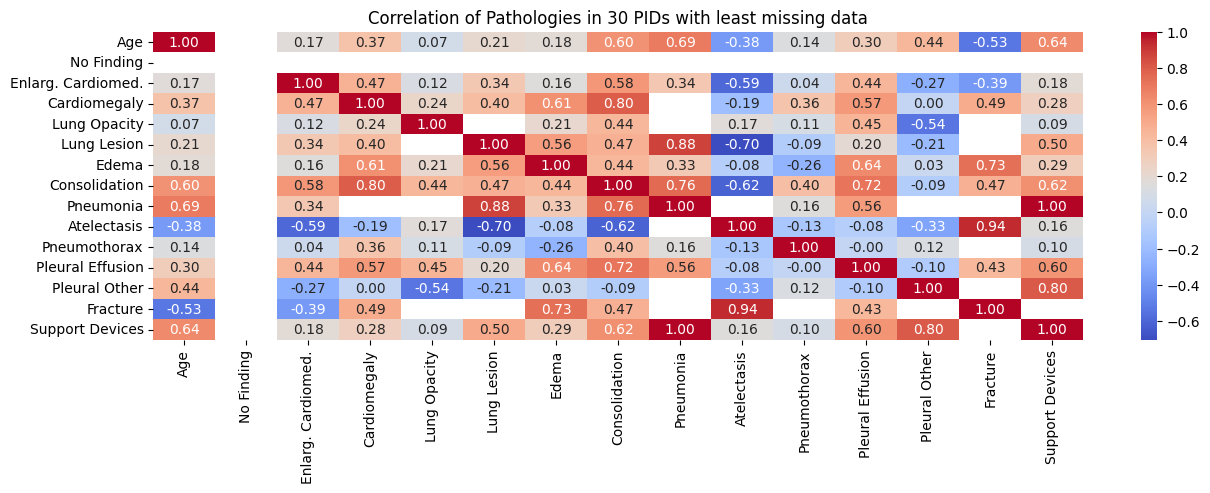

<Figure size 3000x600 with 0 Axes>

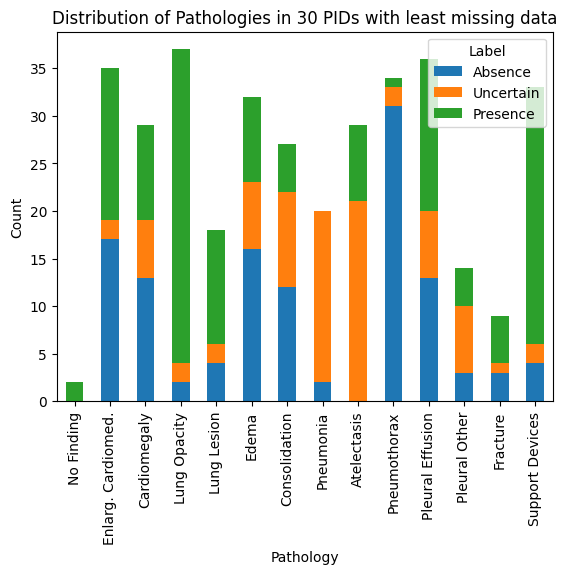

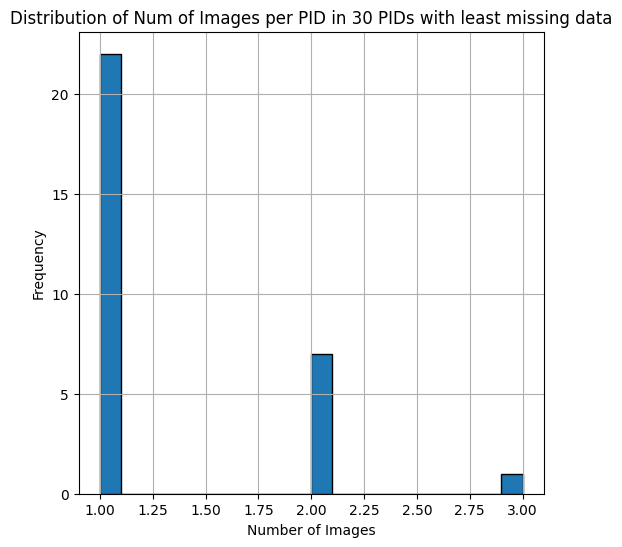

In [48]:
print("30 PIDs with least missing data")
correlation_heatmap(least_nan_pids_df, '30 PIDs with least missing data')
pathology_dist(least_nan_pids_df, '30 PIDs with least missing data')
images_per_pid_histogram(least_nan_pids_df, '30 PIDs with least missing data')

# The 30 PIDs with the least missing data are not representative
# of the dataset as a whole. The distribution of pathologies
# is noticably different and the correlations between pathologies
# are much stronger. 
# Most notably the PIDs with the least missing data have a much
# lower number of images per PID than the dataset as a whole, with
# most PIDs having only 1 image, and none having more than 3
# This is might explain the stronger correlations between pathologies
# as PIDs have fewer images and thus are more likely to have
# consistent labels across images

In [49]:
num_images_per_pid = train_df.groupby('PID').size()
num_images_per_pid.describe()

count    51631.000000
mean         3.450582
std          4.626620
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         92.000000
dtype: float64

30 PIDs with most images


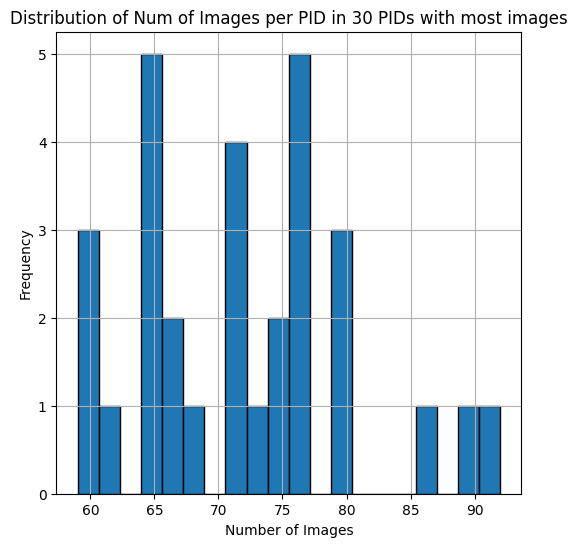

<Figure size 3000x600 with 0 Axes>

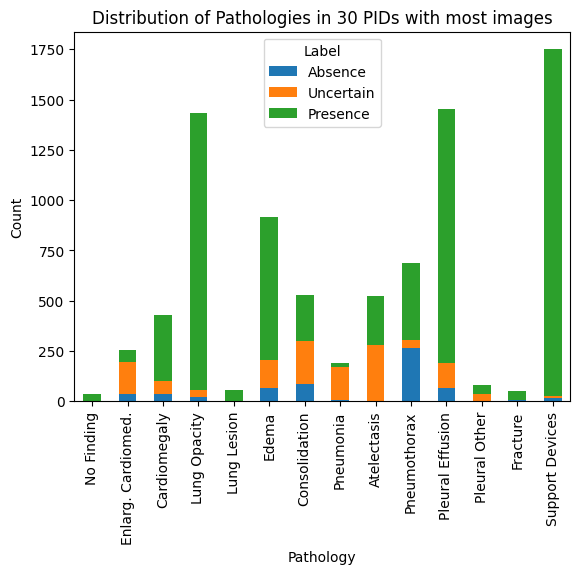

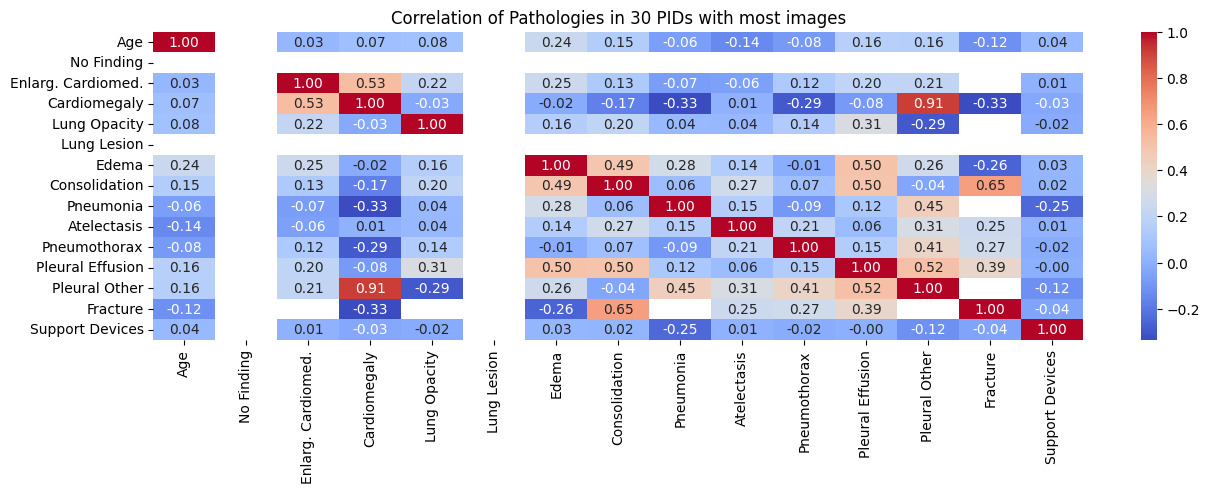

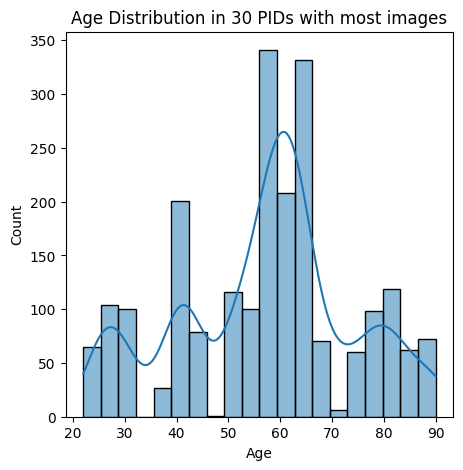

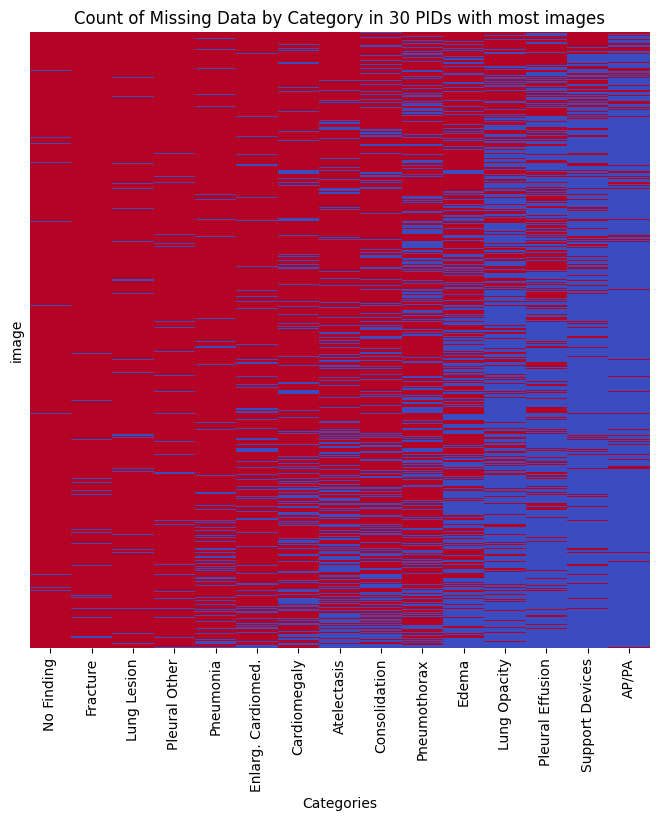

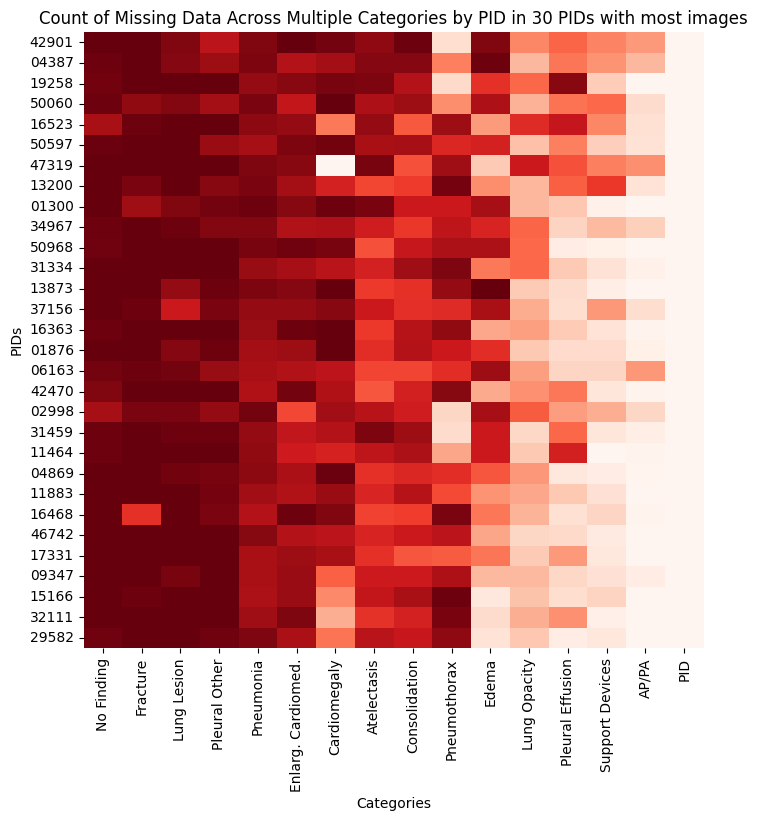

In [50]:
num_images_per_pid = train_df.groupby('PID').size()
most_images = num_images_per_pid.sort_values(ascending=False).index
most_images = most_images[:30]
most_images_pids_df = train_df[train_df['PID'].isin(most_images)]

print("30 PIDs with most images")
images_per_pid_histogram(most_images_pids_df, '30 PIDs with most images')
pathology_dist(most_images_pids_df, '30 PIDs with most images')
correlation_heatmap(most_images_pids_df, '30 PIDs with most images')
age_dist(most_images_pids_df, '30 PIDs with most images')
missing_per_image(most_images_pids_df, '30 PIDs with most images')
missing_per_pid(most_images_pids_df, '30 PIDs with most images')


# The 30 PIDs with the most images are also not representative
# of the dataset as a whole. The distribution of pathologies
# for example has a high representation of support devices, which
# would make sense as patients with support devices are likely
# to have routine images taken of them. 
# Thinking about this further, the distribution of pathologies
# in the dataset as a whole is likely skewed by the fact that
# some patients have many more images than others and is something
# to keep in mind when training models on this data to avoid bias
# The distribution of ages in the 30 PIDs with the most images
# is also not representative of the dataset as a whole, with
# suprisingly fewer old patients
# The amount of missing data in the 30 PIDs with the most images
# doesn't seem significantly different from the dataset as a whole



Train


/var/folders/tn/sy1jj71s6518jlpspmxf6s440000gn/T/ipykernel_19909/2374423800.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_counts = df.groupby('PID').apply(lambda x: (x == 1).any(axis=0).sum())


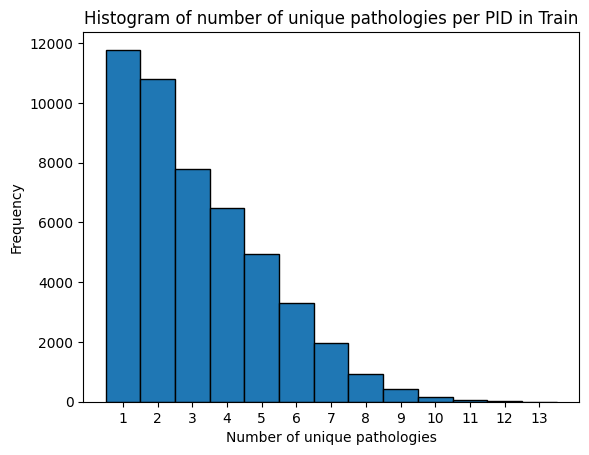

Subset


/var/folders/tn/sy1jj71s6518jlpspmxf6s440000gn/T/ipykernel_19909/2374423800.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_counts = df.groupby('PID').apply(lambda x: (x == 1).any(axis=0).sum())


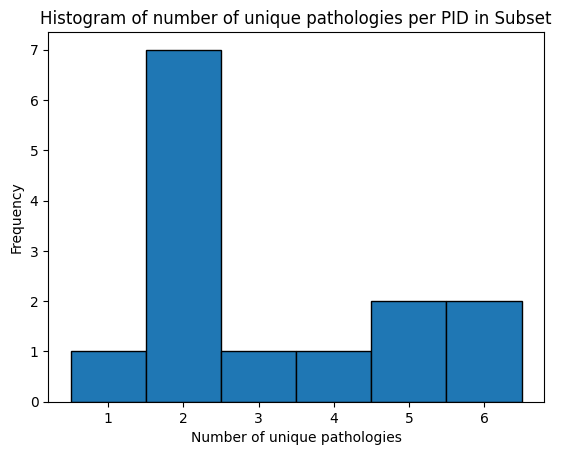

Train


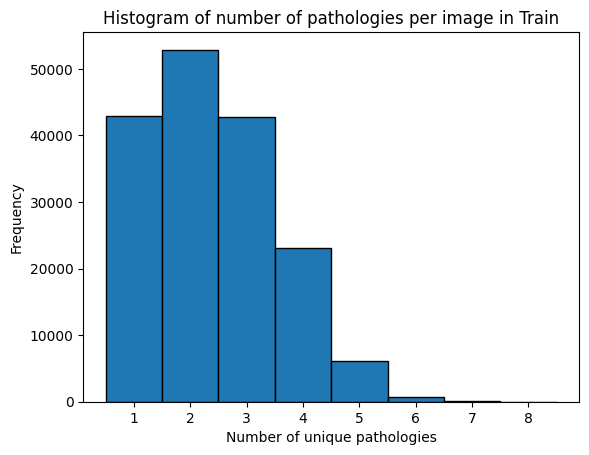

Subset


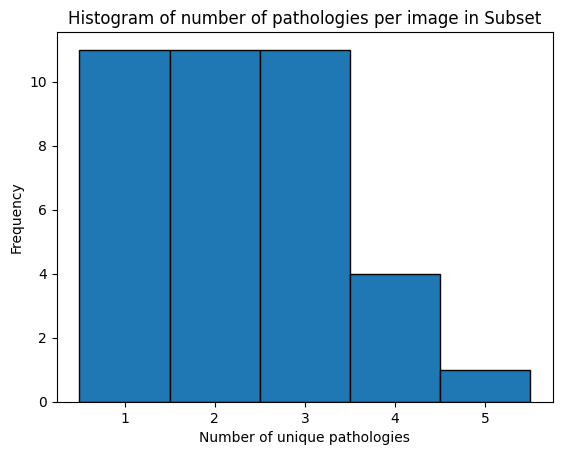

In [51]:


def pathologies_per_pid(df, title):
    df = df.drop(columns=['Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])
    grouped_counts = df.groupby('PID').apply(lambda x: (x == 1).any(axis=0).sum())

    plt.hist(grouped_counts, bins=range(1, max(grouped_counts)+2), align='left', edgecolor='black')
    plt.xlabel('Number of unique pathologies')
    plt.ylabel('Frequency')
    plt.title('Histogram of number of unique pathologies per PID in ' + title)
    plt.xticks(range(1, max(grouped_counts)+1))
    plt.show()

print("Train")
pathologies_per_pid(train_df, 'Train')
print("Subset")
pathologies_per_pid(subset_df, 'Subset')


def pathologies_per_image(df, title):
    df = df.drop(columns=['Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])
    counts = df.fillna(0).eq(1).sum(axis=1)

    plt.hist(counts, bins=range(1, counts.max()+2), align='left', edgecolor='black')
    plt.xlabel('Number of unique pathologies')
    plt.ylabel('Frequency')
    plt.title('Histogram of number of pathologies per image in ' + title)
    plt.xticks(range(1, counts.max()+1))
    plt.show()

print("Train")
pathologies_per_image(train_df, 'Train')
print("Subset")
pathologies_per_image(subset_df, 'Subset')


# The distribution of the number of unique pathologies per PID
# peaks at 1 with a strong positive skew, although the range is
# quite large. This trend is not quite as strong with the number
# of unique pathologies per image, and the range is much smaller.

30 PIDs with least missing data


/var/folders/tn/sy1jj71s6518jlpspmxf6s440000gn/T/ipykernel_19909/2374423800.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_counts = df.groupby('PID').apply(lambda x: (x == 1).any(axis=0).sum())


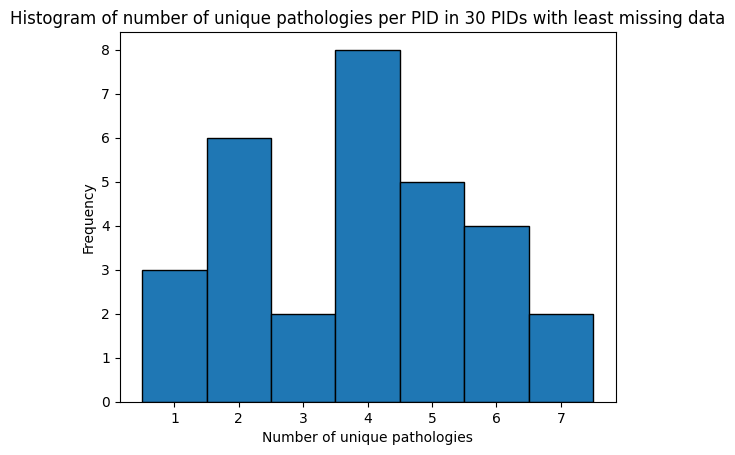

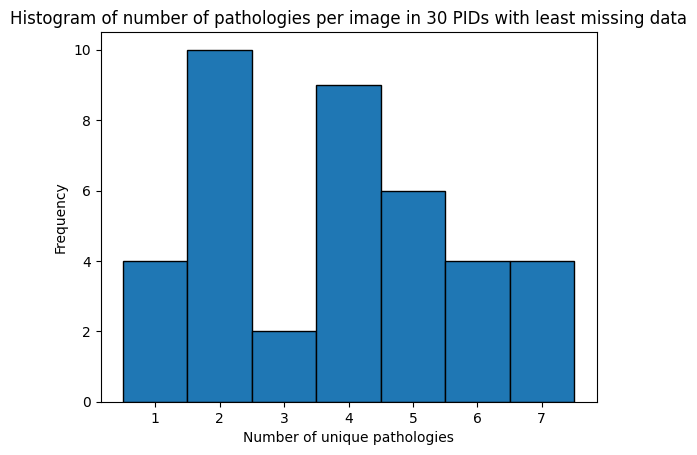

30 PIDs with most images


/var/folders/tn/sy1jj71s6518jlpspmxf6s440000gn/T/ipykernel_19909/2374423800.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_counts = df.groupby('PID').apply(lambda x: (x == 1).any(axis=0).sum())


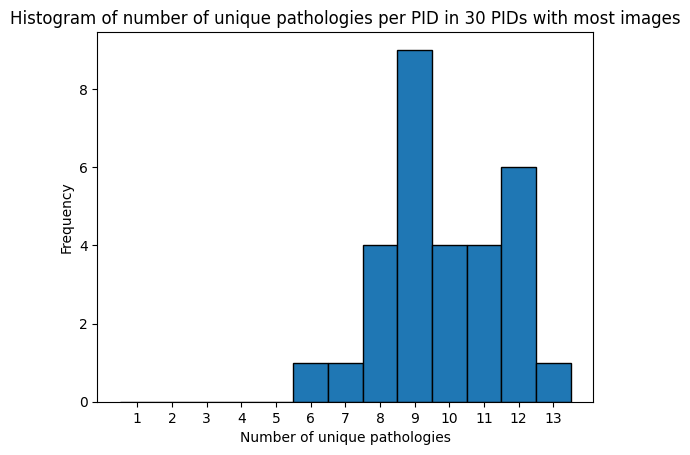

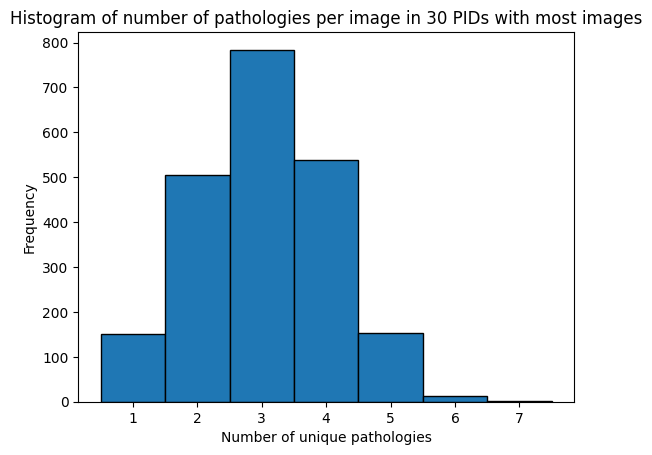

In [52]:
print("30 PIDs with least missing data")
pathologies_per_pid(least_nan_pids_df, '30 PIDs with least missing data')
pathologies_per_image(least_nan_pids_df, '30 PIDs with least missing data')

print("30 PIDs with most images")
pathologies_per_pid(most_images_pids_df, '30 PIDs with most images')
pathologies_per_image(most_images_pids_df, '30 PIDs with most images')

# The number of unique pathologies per PID and per image in the 
# 30 PIDs with the most images is centered around 10 which is much
# higher than the dataset as a whole. This is likely due to the
# fact that these PIDs have more images and thus more opportunities
# for different pathologies to be present and may be associated 
# with PIDs needing more medical attention. This is another
# factor to consider when training models on this data to avoid bias.
# The presentation of more than one pathology in an image
# may make it more difficult to train models on this data as
# the presence of one pathology may appear different depending
# on the presence of another pathology and the signal may be
# harder to discern.
# However, since the number of unique pathologies per PID and per image
# is not high for these 30, it would seem that this high number
# of unique pathologies is not as caused my multiple concurrent
# pathologies though but rather potentially subsequent pathologies,
# although this brings concern to the variability and consistency
# of the labels in the dataset for a given PID, since there is so
# much missing data and the labels are not always consistent across images.
# It is difficult to discern when lack of consistency is due to changes
# in the patient's condition and when it is due to missing data or
# inconsistent labeling.

In [53]:
# df = train_df.drop(columns=['Study', 'View', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA'])

# for pid in df['PID'].unique():
#     pid_df = df[df['PID'] == pid].copy()
#     num_images = len(pid_df)

#     pid_df.drop(columns=['PID'], inplace=True)
#     pid_df = pid_df.astype(str) 
#     counts = pid_df.apply(lambda x: x.value_counts(dropna=False))
#     counts = counts.fillna(0)


#     print(pid)
#     print(counts)
